In [2]:
import numpy as np,pandas as pd

In [9]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils import to_categorical
from keras import utils

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
import matplotlib.pyplot as plt

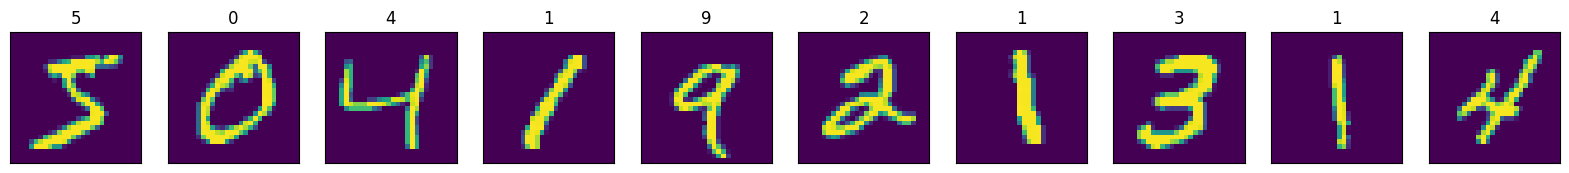

In [7]:
fig,ax=plt.subplots(ncols=10,sharex=True,sharey=False,figsize=(20,4))
for i in range(10):
    ax[i].set_title(y_train[i])
    ax[i].imshow(x_train[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)

In [10]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [22]:
model=Sequential()

In [23]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(5,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


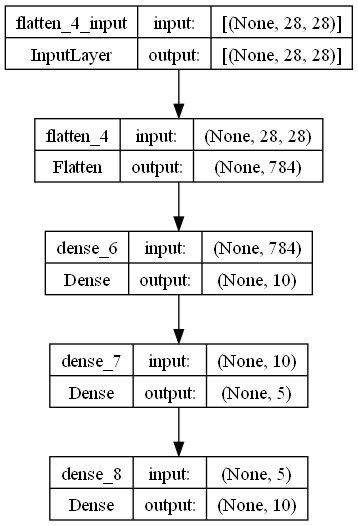

In [26]:
utils.plot_model(model,show_shapes=True)

In [31]:
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')

In [48]:
new=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5029 - acc: 0.8573 - val_loss: 0.4734 - val_acc: 0.8657
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4826 - acc: 0.8673 - val_loss: 0.4924 - val_acc: 0.8625
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4793 - acc: 0.8716 - val_loss: 0.4562 - val_acc: 0.8763
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4779 - acc: 0.8727 - val_loss: 0.4588 - val_acc: 0.8757
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4900 - acc: 0.8627 - val_loss: 0.4637 - val_acc: 0.8774
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4727 - acc: 0.8744 - val_loss: 0.4538 - val_acc: 0.8823
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4836 - acc: 0.8719 - val_loss: 0.4603 - val_acc: 0.8671
Epoch 8/20
1875/1875 [==============================] - 3s 2ms

In [50]:
new.history

{'loss': [0.5028717517852783,
  0.48260989785194397,
  0.47926315665245056,
  0.47792842984199524,
  0.4899963438510895,
  0.4727075397968292,
  0.483625203371048,
  0.4904705584049225,
  0.47206392884254456,
  0.4717147648334503,
  0.45948851108551025,
  0.4767290949821472,
  0.45665594935417175,
  0.47734183073043823,
  0.47186413407325745,
  0.4456130862236023,
  0.4377199411392212,
  0.44073259830474854,
  0.4373500645160675,
  0.44579699635505676],
 'acc': [0.857283353805542,
  0.8673499822616577,
  0.8715500235557556,
  0.8727333545684814,
  0.862666666507721,
  0.8743500113487244,
  0.871916651725769,
  0.8701333403587341,
  0.8758500218391418,
  0.8740500211715698,
  0.8750500082969666,
  0.8725833296775818,
  0.8798333406448364,
  0.8740833401679993,
  0.8727999925613403,
  0.8824166655540466,
  0.8821499943733215,
  0.8805333375930786,
  0.884850025177002,
  0.8809499740600586],
 'val_loss': [0.4733765721321106,
  0.49235475063323975,
  0.45619627833366394,
  0.45883429050445

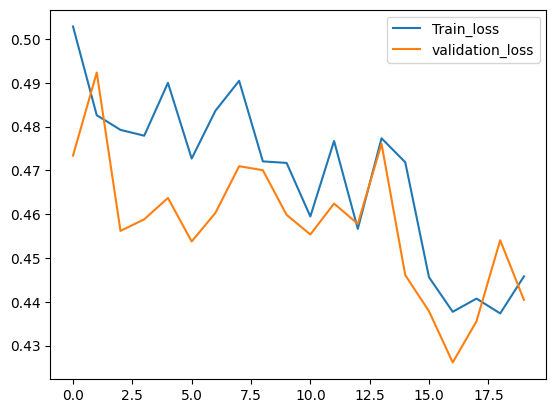

In [51]:
plt.plot(new.history['loss'],label='Train_loss')
plt.plot(new.history['val_loss'],label='validation_loss')
plt.legend()

In [55]:
model.save("1.h5")

C:\Users\lager\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
from tensorflow import keras

In [57]:
df=keras.models.load_model("1.h5")

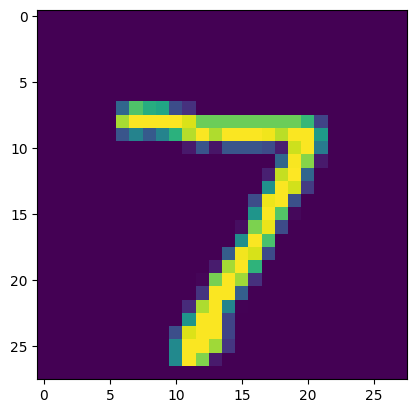

In [52]:
plt.imshow(x_test[0])

In [53]:
import numpy as np

In [58]:
x=np.reshape(x_test[0],(1,28,28))
np.argmax(df.predict(x))

1/1 [==============================] - 0s 92ms/step


7

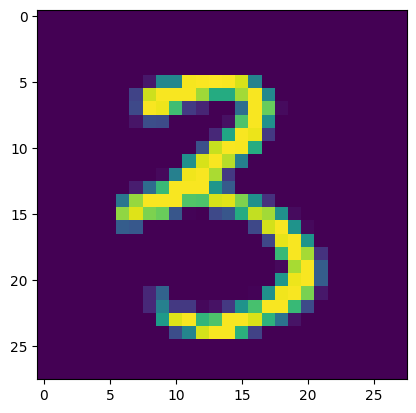

In [64]:
plt.imshow(x_test[5000])

In [65]:
x=np.reshape(x_test[5000],(1,28,28))
np.argmax(df.predict(x))

1/1 [==============================] - 0s 16ms/step


3